In [78]:
#Imports
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [79]:
def get_documents(path:str = "../data/Soportes") -> dict:
    results = {}
    for root, dirs, files in os.walk(path):
        if len(files) > 0:
            results[int(root.split('\\')[1])] = files
        else:
            print('El *'+root+'* no tiene ningún file')
            continue
    return results
    

In [83]:
excel = pd.read_excel("../data/VF - Información Procesos y Hojas de Vida PAA.xlsm", "Formato2")

In [27]:
files = get_documents()

El *../data/Soportes* no tiene ningún file


# Exploratory analysis

In [74]:
#Number and type of documents
temp = {}
final = []
for k,v in zip(files.keys(), files.values()):
    for i in v:
        final.append(i.split('.')[1].lower())
    temp[k] = len(v)

Text(0.5, 0, '#Documents per tender')

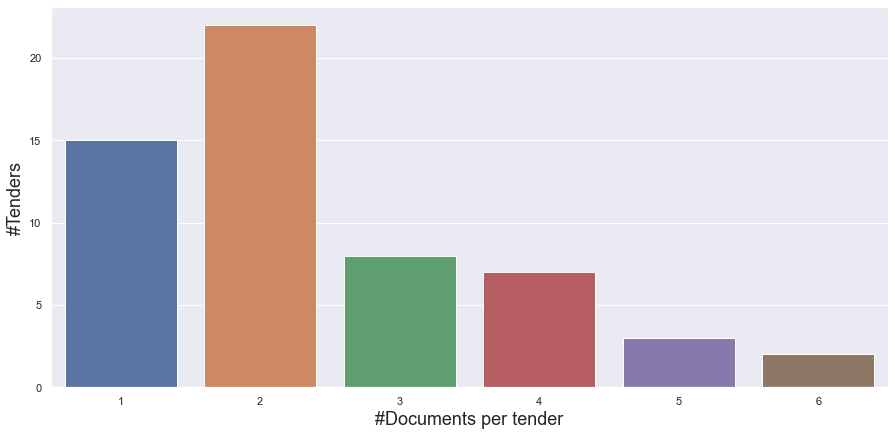

In [71]:
#Number of documents per tender
plt.figure(figsize=(15,7))
resp = pd.DataFrame(temp, index=range(1)).T.rename(columns={0:'Count'})
sns.countplot(resp.Count)
plt.ylabel('#Tenders',fontsize=18)
plt.xlabel('#Documents per tender',fontsize=18)

Text(0.5, 0, 'File type')

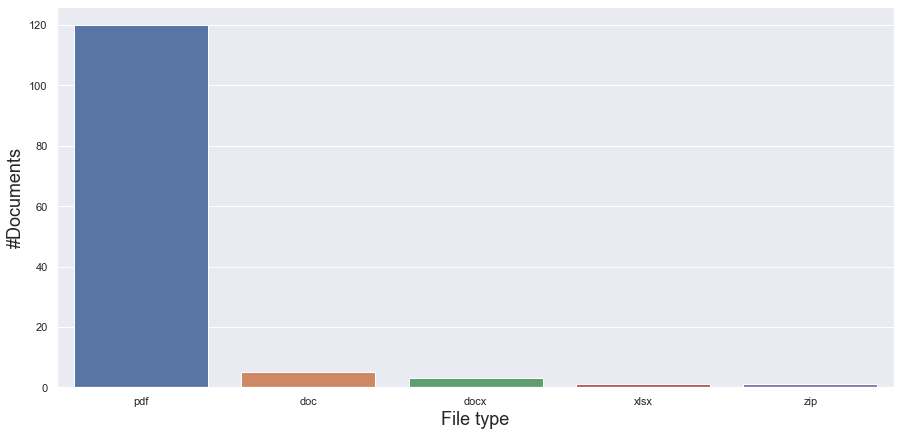

In [72]:
#Type of documents
plt.figure(figsize=(15,7))
sns.countplot([i for i in final if i in ('pdf','doc','docx','zip','xlsx')])
plt.ylabel('#Documents',fontsize=18)
plt.xlabel('File type',fontsize=18)

In [88]:
#Missing data ID
excel.ID.drop_duplicates().tolist()
for i in results.keys():
    if i not in excel.ID.drop_duplicates().tolist():
        print(i)

109
112
131
27
39
48
7
76
89
91
